# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
from pprint import pprint

In [41]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | edinburgh of the seven seas
Processing Record 2 | adamstown
Processing Record 3 | albany
Processing Record 4 | vorgashor
Processing Record 5 | bredasdorp
Processing Record 6 | timimoun
Processing Record 7 | hammerfest
Processing Record 8 | cromer
Processing Record 9 | berdigestyakh
Processing Record 10 | mozarlandia
Processing Record 11 | iskateley
Processing Record 12 | bethel
Processing Record 13 | nova xavantina
Processing Record 14 | ancud
Processing Record 15 | zag
Processing Record 16 | badger
Processing Record 17 | invercargill
Processing Record 18 | ushuaia
Processing Record 19 | west island
Processing Record 20 | grytviken
Processing Record 21 | port-aux-francais
Processing Record 22 | isafjordur
Processing Record 23 | akjoujt
Processing Record 24 | papatowai
Processing Record 25 | puerto natales
Processing Record 26 | al qabil
City not found. Skipping...
Processing Record 27 | koppies
Processing Reco

Processing Record 237 | petauke
City not found. Skipping...
Processing Record 238 | podgornoye
Processing Record 239 | valparaiso
Processing Record 240 | lubumbashi
Processing Record 241 | mont-dore
Processing Record 242 | papayal
Processing Record 243 | mejit
Processing Record 244 | vila franca do campo
Processing Record 245 | east london
Processing Record 246 | sassandra
Processing Record 247 | sakura
City not found. Skipping...
Processing Record 248 | jayapura
Processing Record 249 | puerto gaitan
Processing Record 250 | tauranga
Processing Record 251 | mount pearl
City not found. Skipping...
Processing Record 252 | farasan
Processing Record 253 | taguatinga
Processing Record 254 | kaka
Processing Record 255 | shingu
Processing Record 256 | zhanaozen
Processing Record 257 | aykhal
Processing Record 258 | geraldton
Processing Record 259 | ilebo
Processing Record 260 | palikir - national government center
Processing Record 261 | farah
Processing Record 262 | talnakh
Processing Record 

Processing Record 470 | kuanda
Processing Record 471 | broome
Processing Record 472 | turhal
Processing Record 473 | jonquiere
Processing Record 474 | vaasa
Processing Record 475 | zuwarah
Processing Record 476 | mustafabad
City not found. Skipping...
Processing Record 477 | menongue
Processing Record 478 | nemuro
Processing Record 479 | walvis bay
Processing Record 480 | banes
Processing Record 481 | khenifra
Processing Record 482 | garoowe
City not found. Skipping...
Processing Record 483 | ebaye
Processing Record 484 | south boston
Processing Record 485 | kiknur
Processing Record 486 | enewetak
Processing Record 487 | manthani
Processing Record 488 | tosontsengel
Processing Record 489 | zaterechnyy
Processing Record 490 | dazhong
Processing Record 491 | chaohu
Processing Record 492 | tekirdag
Processing Record 493 | howrah
Processing Record 494 | xuchang
City not found. Skipping...
Processing Record 495 | mitchell
Processing Record 496 | sudislavl'
Processing Record 497 | at taj
Pro

In [48]:
city_data_df= pd.DataFrame(
                            {
                                "City":city_name,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":max_temp,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date
                            }
                         )

city_data_df.Date = city_data_df.Date.map(lambda x: '{:.0f}'.format(x))
city_data_df.Cloudiness = city_data_df.Cloudiness.map(lambda x: '{:.0f}'.format(x))
city_data_df.Humidity = city_data_df.Humidity.map(lambda x: '{:.0f}'.format(x))

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,59.79,79,100,32.39,SH,1687724200
1,Adamstown,-25.0660,-130.1015,72.64,80,53,16.71,PN,1687724202
2,Albany,42.6001,-73.9662,88.88,62,24,1.01,US,1687724159
3,Vorgashor,67.5833,63.9500,50.00,69,87,5.23,RU,1687724204
4,Bredasdorp,-34.5322,20.0403,54.52,94,100,11.16,ZA,1687724205
5,Timimoun,29.2639,0.2310,98.98,7,0,17.27,DZ,1687724207
6,Hammerfest,70.6634,23.6821,48.65,81,40,8.05,NO,1687724208
7,Cromer,52.9312,1.2989,77.00,59,20,20.00,GB,1687724209
8,Berdigestyakh,62.0989,126.6992,67.10,75,7,1.97,RU,1687724210
9,Mozarlândia,-14.7447,-50.5706,87.91,24,100,2.01,BR,1687723942


In [49]:
# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,59.79,79,100,32.39,SH,1687724200
1,Adamstown,-25.0660,-130.1015,72.64,80,53,16.71,PN,1687724202
2,Albany,42.6001,-73.9662,88.88,62,24,1.01,US,1687724159
3,Vorgashor,67.5833,63.9500,50.00,69,87,5.23,RU,1687724204
4,Bredasdorp,-34.5322,20.0403,54.52,94,100,11.16,ZA,1687724205


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,59.79,79,100,32.39,SH,1687724200
1,Adamstown,-25.0660,-130.1015,72.64,80,53,16.71,PN,1687724202
2,Albany,42.6001,-73.9662,88.88,62,24,1.01,US,1687724159
3,Vorgashor,67.5833,63.9500,50.00,69,87,5.23,RU,1687724204
4,Bredasdorp,-34.5322,20.0403,54.52,94,100,11.16,ZA,1687724205


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

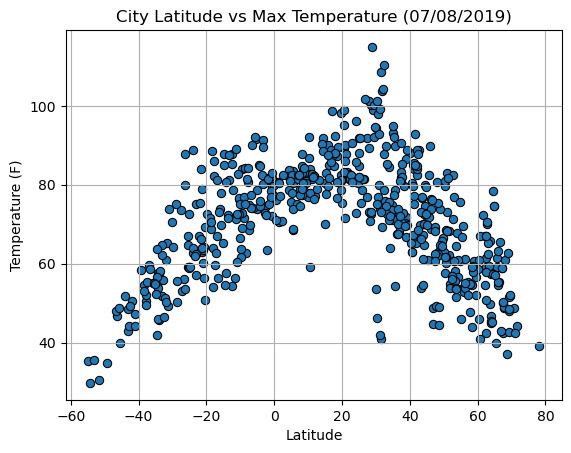

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

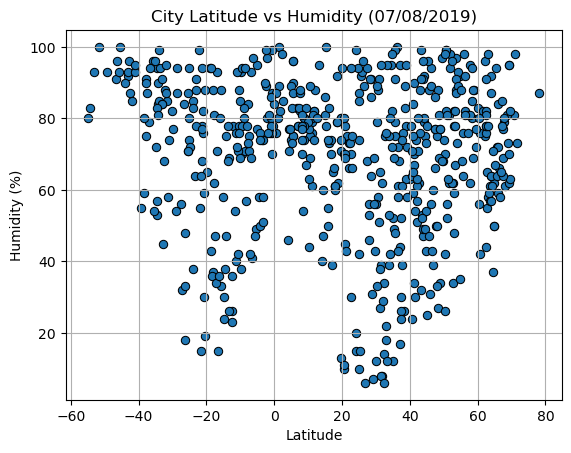

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

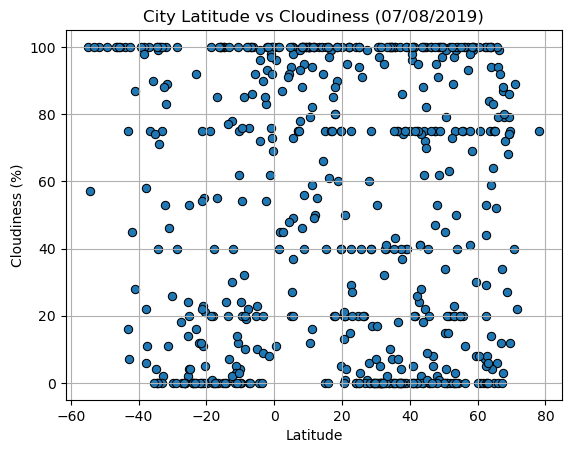

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

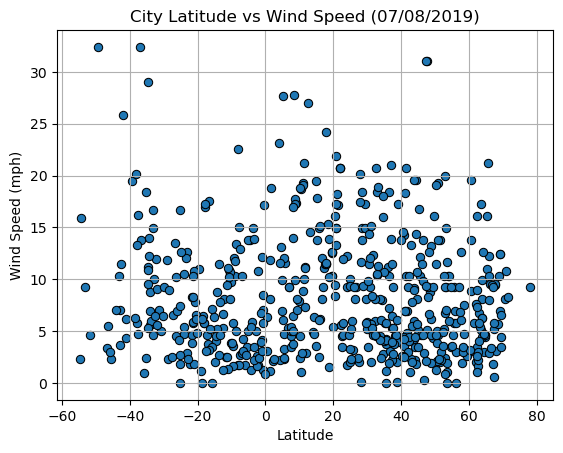

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Albany,42.6001,-73.9662,88.88,62,24,1.01,US,1687724159
3,Vorgashor,67.5833,63.9500,50.00,69,87,5.23,RU,1687724204
5,Timimoun,29.2639,0.2310,98.98,7,0,17.27,DZ,1687724207
6,Hammerfest,70.6634,23.6821,48.65,81,40,8.05,NO,1687724208
7,Cromer,52.9312,1.2989,77.00,59,20,20.00,GB,1687724209


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,59.79,79,100,32.39,SH,1687724200
1,Adamstown,-25.0660,-130.1015,72.64,80,53,16.71,PN,1687724202
4,Bredasdorp,-34.5322,20.0403,54.52,94,100,11.16,ZA,1687724205
9,Mozarlândia,-14.7447,-50.5706,87.91,24,100,2.01,BR,1687723942
12,Nova Xavantina,-14.6667,-52.3500,84.94,30,100,4.05,BR,1687724215


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.665


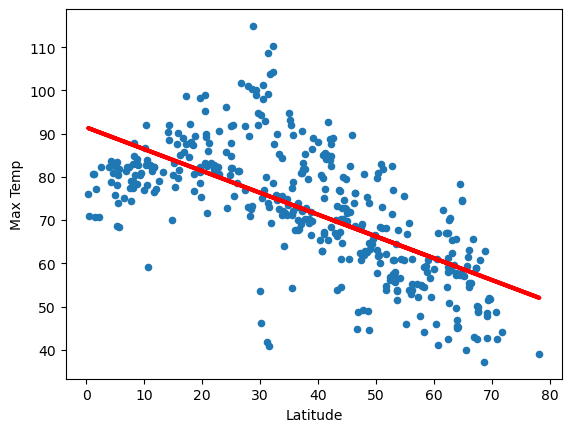

In [87]:
# Linear regression on Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-squared is: 0.792


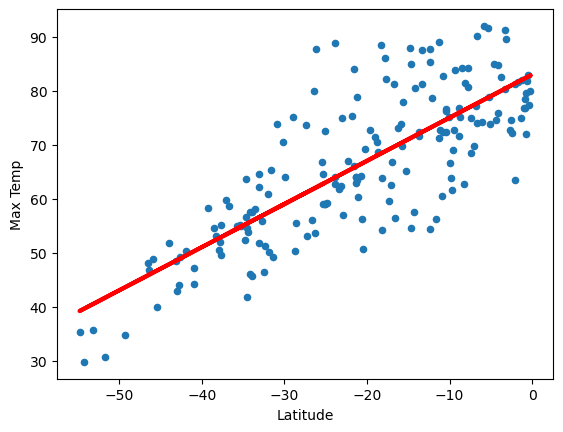

In [86]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.019


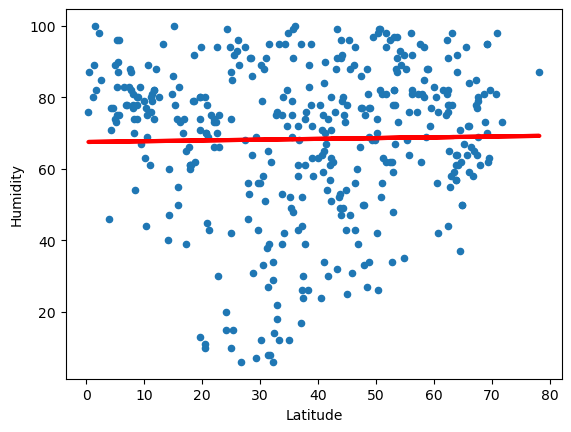

In [85]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: -0.225


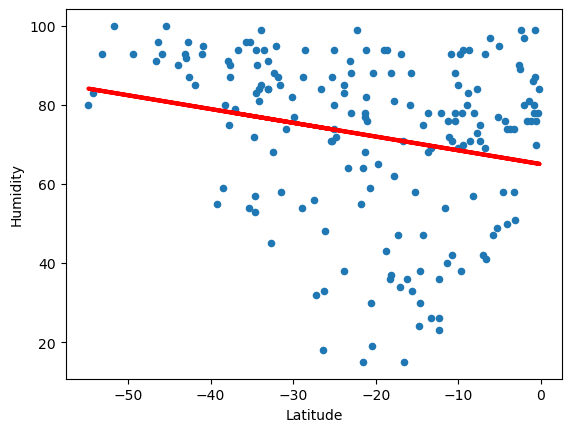

In [84]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.111


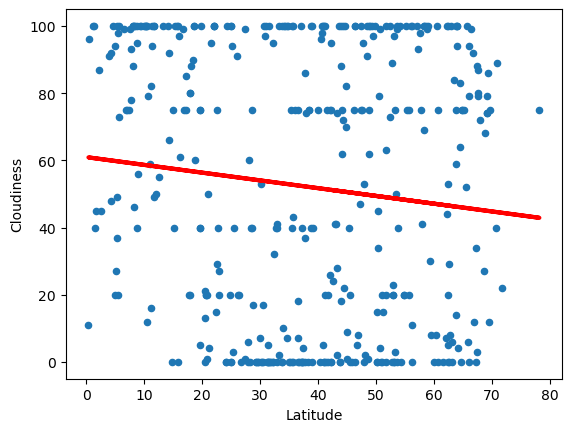

In [83]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: -0.065


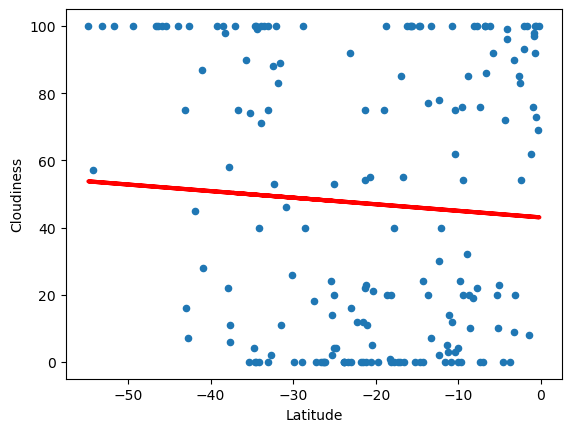

In [88]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.205


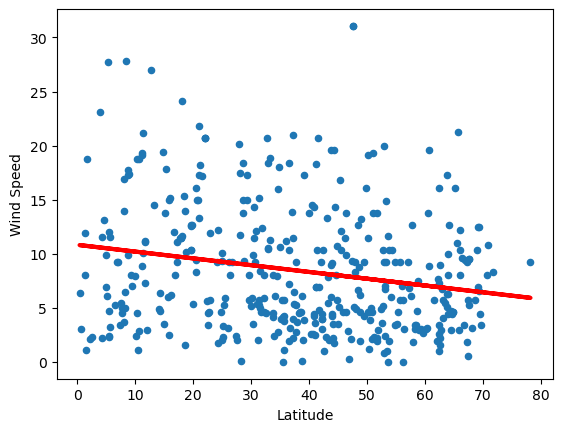

In [89]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: -0.241


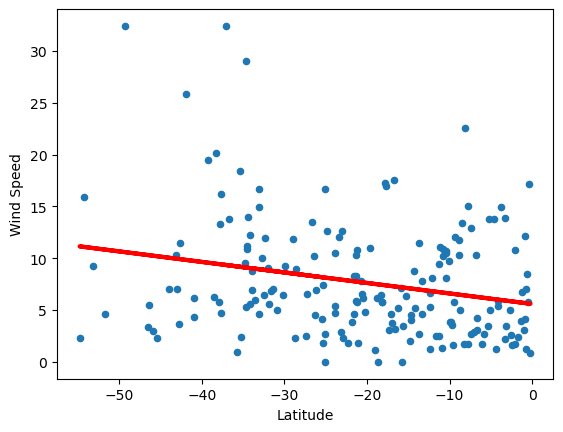

In [90]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE